# Machine Learning in Action
**Note:** This project is used to learn 《Machine Learning in Action》, @author: *Peter Harrington*       
    **E-mail:** lq@mpig.com.cn  
    **Data:** May 7, 2018 

## *CH03 Decision Tree*

#### 1.测试函数

In [1]:
import sys
sys.path.append(r'G:\Machine Learning in Action\code\Ch03')#set your own path
import trees
import treePlotter

In [2]:
#测试createDataSet,calcShannonEnt函数
myDat,labels = trees.createDataSet()
print myDat
print trees.calcShannonEnt(myDat)
#改变分类观察熵变化
myDat[0][-1]='maybe'
print 'new myDat:',myDat
print 'new shannonEnt:',trees.calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.970950594455
new myDat: [[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
new shannonEnt: 1.37095059445


In [3]:
#extend() 与 append() 方法的比较
a = [1,2,3]
b = [4,5,6]
a.append(b)
print a
a.extend(b)
print a

[1, 2, 3, [4, 5, 6]]
[1, 2, 3, [4, 5, 6], 4, 5, 6]


In [6]:
#测试splitDataSet函数
myDat,labels = trees.createDataSet()
print myDat
print labels
print trees.splitDataSet(myDat,0,1)
print trees.splitDataSet(myDat,0,0)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [9]:
#测试chooseBestFeatureToSplit函数
trees.chooseBestFeatureToSplit(myDat)

0

#### 2.海洋动物分类问题

In [10]:
#测试createDataSet函数
myDat,labels = trees.createDataSet()
myTree = trees.createTree(myDat,labels)
print myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


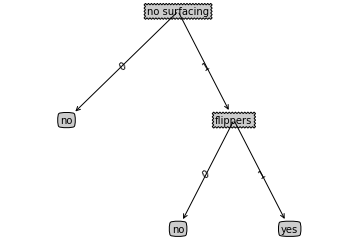

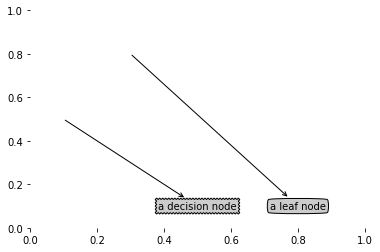

In [11]:
#测试createPlot函数
# reload(treePlotter)
treePlotter.createPlot(myTree)
treePlotter.createPlot_test()

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}


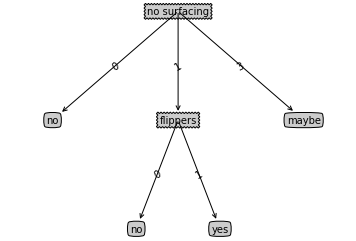

In [12]:
#更改决策树
myTree['no surfacing'][3] = 'maybe'
print myTree
treePlotter.createPlot(myTree)

In [20]:
#测试retrieveTree,classify函数
myDat,labels = trees.createDataSet()
myTree = treePlotter.retrieveTree(0)
print 'myDat:',myDat
print 'labels:',labels
print 'myTree:',myTree
print '[no surfacing=1,flippers=0]:',trees.classify(myTree,labels,[1,0])
print '[no surfacing=1,flippers=1]:',trees.classify(myTree,labels,[1,1])

myDat: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
labels: ['no surfacing', 'flippers']
myTree: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
[no surfacing=1,flippers=0]: no
[no surfacing=1,flippers=1]: yes


In [26]:
#测试storeTree,grabTree函数
trees.storeTree(myTree,'decision_tree.txt')
trees.grabTree('decision_tree.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

通过上面的代码，我们可以将分类器存储在上，而不用每次对数据分类时重新学习一遍， 这也是决策树的优点之一,像第2章介绍了k-近邻算法就无法持化分类器。我们可以预先提 并存储数据集中包含的知识信息，在需要对事物进行分类时再使用这些知识

#### 3.示例：使用决策树预测隐形眼镜类型

{'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {'perscript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}, 'no': {'age': {'pre': 'soft', 'presbyopic': {'perscript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}}}}}


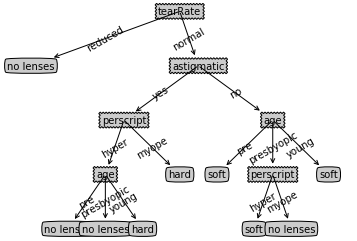

In [4]:
fr = open('G:\Machine Learning in Action\code\Ch03\lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','perscript','astigmatic','tearRate']
# lensesLabels = ['tearRate','astigmatic','perscript','age']
lensesTree = trees.createTree(lenses,lensesLabels)
print lensesTree
treePlotter.createPlot(lensesTree)

In [9]:
#键入一个患者的信息，决策出适合该患者的隐形眼镜类型
# lensesLabels = ['age','perscript','astigmatic','tearRate']
trees.classify(lensesTree,lensesLabels,['presbyopic','hyper','no','normal'])

'soft'